# Import Packages and data exploration

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('vdjdb.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [3]:
dataset.isnull().sum()

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

# Data Transformation

## Removing Unwanted Columns

Some of the columns contain specific information about the literature sources (reference.id), sequencing methods (method, web.method.seq), collection method (web.method) etc., some of which are related to how **vdjdb.score** is calculated.

Therefore we first remove these columns. Deleted columns are as follows: 
-  reference.id
-  method
-  meta
-  cdr3fix
-  web.method  
-  web.method.seq
-  web.cdr3fix.nc
-  web.cdr3fix.unmp

(Work by Yutong)

In [4]:
dataset = dataset.iloc[:, list(range(0, 12)) + [16]]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.2+ MB


## Combine cdr3-v_seg-j_seg in one column

In [5]:
def create_cdr3_v_j_column(row):
    """
    This function will combine cdr3, v-segm and j-segm
    """
    cdr3 = row['cdr3']
    v_segm = row['v.segm']
    j_segm = row['j.segm']
    final_string = ''
    
    if not pd.isna(cdr3):
        final_string = cdr3
    if not pd.isna(v_segm):
        final_string = final_string + '_' + v_segm
    if not pd.isna(j_segm):
        final_string = final_string + '_' + j_segm
    
    return final_string

dataset['cdr3_v_j'] = dataset.apply(create_cdr3_v_j_column,axis=1)

In [6]:
dataset['cdr3_v_j'].head(5)

0          CIVRAPGRADMRF_TRAV26-1*01_TRAJ43*01
1    CASSYLPGQGDHYSNQPQHF_TRBV13*01_TRBJ1-5*01
2     CASSFEAGQGFFSNQPQHF_TRBV13*01_TRBJ1-5*01
3           CAVPSGAGSYQLTF_TRAV20*01_TRAJ28*01
4     CASSFEPGQGFYSNQPQHF_TRBV13*01_TRBJ1-5*01
Name: cdr3_v_j, dtype: object

## Separate Alpha, Beta chains datasets

In [7]:
dataset['gene'].unique()

array(['TRA', 'TRB'], dtype=object)

In [8]:
dataset_alpha = dataset[dataset['gene'] == 'TRA']
dataset_beta = dataset[dataset['gene'] == 'TRB']

In [9]:
dataset_alpha.head(4)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_v_j
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CIVRAPGRADMRF_TRAV26-1*01_TRAJ43*01
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAVPSGAGSYQLTF_TRAV20*01_TRAJ28*01
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAVKASGSRLT_TRAV2*01
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAYRPPGTYKYIF_TRAV38-2/DV8*01_TRAJ40*01


In [10]:
dataset_beta.head(4)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_v_j
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSYLPGQGDHYSNQPQHF_TRBV13*01_TRBJ1-5*01
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSFEAGQGFFSNQPQHF_TRBV13*01_TRBJ1-5*01
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSFEPGQGFYSNQPQHF_TRBV13*01_TRBJ1-5*01
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSYEPGQVSHYSNQPQHF_TRBV13*01_TRBJ1-5*01


# Relationship Exploration 

## Dataset grouped on anitegen.epitoge, finding the count of cdr3_v_j

In [11]:
group_epitope_cdr3_v_j = dataset.groupby(['antigen.epitope','cdr3_v_j']).size().to_frame('count').reset_index()
group_epitope_cdr3_v_j.head(5)

,antigen.epitope,cdr3_v_j,count
0,AAFKRSCLK,CAGAIPRDDKIIF_TRAV27*01_TRAJ30*01,1
1,AAFKRSCLK,CAGARNDYKLSF_TRAV25*01_TRAJ20*01,1
2,AAFKRSCLK,CALATHTGTASKLTF_TRAV38-1*01_TRAJ44*01,1
3,AAFKRSCLK,CASSLNPGRSDSPLHF_TRBV7-6*01_TRBJ2-1*01,1
4,AAFKRSCLK,CASSQDPGSSYNEQFF_TRBV4-3*01_TRBJ2-1*01,1


### Finding top 10 values

In [12]:
group_epitope_cdr3_v_j.sort_values(['count'],ascending=False,inplace=True)
group_epitope_cdr3_v_j.to_csv('Visualisation_Df/group_epitope_cdr3_v_j.csv',index=False)

## Dataset grouped on species & anitegen.epitoge, finding the count of cdr3_v_j

In [13]:
group_epitope_species_cdr3_v_j = dataset.groupby(['antigen.epitope','species','cdr3_v_j']).size().to_frame('count').reset_index()

### Top 10 values

In [14]:
group_epitope_species_cdr3_v_j.sort_values(['count','antigen.epitope'],ascending=False,inplace=True)

In [15]:
len(group_epitope_species_cdr3_v_j.head(50)[group_epitope_species_cdr3_v_j['antigen.epitope'] == 'GILGFVFTL'])

<ipython-input-15-9a52ab0b4f1e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(group_epitope_species_cdr3_v_j.head(50)[group_epitope_species_cdr3_v_j['antigen.epitope'] == 'GILGFVFTL'])


17

## Count of most occurring CDR3_V_J combinations for each species

In [16]:
count_of_cdr3_v_j_df = dataset.groupby(['cdr3_v_j','species']).size().to_frame('count').reset_index()

In [17]:
count_of_cdr3_v_j_df.sort_values(['count'],ascending=False,inplace=True)

## Count of records for each species

In [18]:
count_of_species_df = dataset.groupby(['species']).size().to_frame('count').reset_index()

In [19]:
count_of_species_df

,species,count
0,HomoSapiens,85329
1,MacacaMulatta,2119
2,MusMusculus,5323


## Count of records for each species and vdj_score

In [20]:
count_of_species_vdj_df = dataset.groupby(['species','vdjdb.score']).size().to_frame('count').reset_index()
count_of_species_vdj_df.to_csv('Visualisation_Df/count_of_species_vdj_df.csv',index=False)

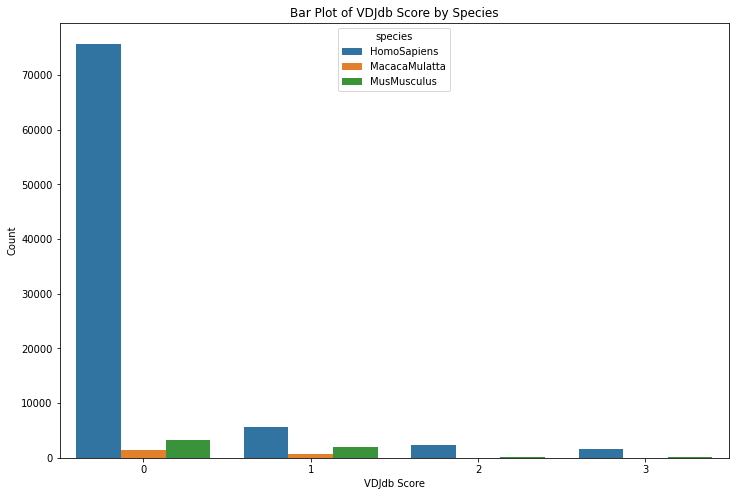

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='vdjdb.score', y='count', hue='species', data=count_of_species_vdj_df)
plt.title('Bar Plot of VDJdb Score by Species')
plt.xlabel('VDJdb Score')
plt.ylabel('Count')

# Save the plot as an image (PNG format by default)
plt.savefig('Figures/Bar_Plot_of_VDJdb_Score_by_Species.png')

plt.show()

In [22]:
count_of_species_vdj_df

,species,vdjdb.score,count
0,HomoSapiens,0,75747
1,HomoSapiens,1,5700
2,HomoSapiens,2,2280
3,HomoSapiens,3,1602
4,MacacaMulatta,0,1432
5,MacacaMulatta,1,687
6,MusMusculus,0,3178
7,MusMusculus,1,1942
8,MusMusculus,2,56
9,MusMusculus,3,147


---

## Can one CDR3 find more than 1 Epitope?

Yes

In [23]:
group_cdr3_antigen = dataset.groupby(['cdr3'])['antigen.epitope'].unique().to_frame('antigen_found').reset_index()

In [24]:
cdr3_found = []
for index,row in group_cdr3_antigen.iterrows():
    if len(row[1]) > 1:
        cdr3_found.append([row[0],len(row[1])])
#         print(row)
 

In [25]:
cdr3_found[:10]

[['CAAADNYGQNFVF', 3],
 ['CAAAETSYDKVIF', 5],
 ['CAAALNTNAGKSTF', 2],
 ['CAAANSGTYQRF', 2],
 ['CAAARDDKIIF', 3],
 ['CAAARMDSSYKLIF', 5],
 ['CAAASSGSWQLIF', 2],
 ['CAAATSSGQKLVF', 2],
 ['CAADDGRLMF', 2],
 ['CAADGGATNKLIF', 2]]

## Can one epitope find more than 1 CDR3?

Yes

In [26]:
group_antigen_cdr3 = dataset.groupby(['antigen.epitope'])['cdr3'].unique().to_frame('cdr3_found').reset_index()

In [27]:
group_antigen_cdr3['cdr3_found_count'] = group_antigen_cdr3['cdr3_found'].apply(lambda x:len(x))

In [28]:
group_antigen_cdr3.sort_values(by=['cdr3_found_count'],ascending=False,inplace=True)

In [69]:
group_antigen_cdr3[group_antigen_cdr3['cdr3_found_count'] < 10]

,antigen.epitope,cdr3_found,cdr3_found_count
412,KGYVYQGL,"[CASSSGVGTEVFF, CASSLGTGTEVFF, CASSPGTGVEQYF, ...",9
193,FLGKIWPSHK,"[CASSFTSGTDTQYF, CASSYVGGDGYTF, CASSLAAGGDEQYF...",9
612,MLAKALRKV,"[CAGPIGTSYDKVIF, CASSSAHYGYTF, CAASDDNYGQNFVF,...",9
326,HMTEVVRHC,"[CAMSGLKEDSSYKLIF, CASSIQQGADTQYF, CVVQPGGYQKV...",9
1,AAGIGILTV,"[CAVNFGGGKLIF, CASSLSFGTEAFF, CAGGTGNQFYF, CAI...",9
...,...,...,...
351,IIWFLLLSV,[CASSLRSMNTEAFF],1
632,MPLKAPKEV,[CASTLTPNTEAFF],1
347,IIFWFSLEL,[CASSLTGTKNNEQFF],1
168,FFSYFAVHF,[CASNPSRGGVTGELFF],1


---

In [30]:
dataset.groupby(['gene']).size()

gene
TRA    38049
TRB    54722
dtype: int64

---

In [31]:
dataset.groupby(['mhc.class']).size()

mhc.class
MHCI     88368
MHCII     4403
dtype: int64

---

---

## How valueable is the different lengths of the CDR

In [32]:
sample_dataset = dataset[['cdr3','antigen.epitope','vdjdb.score','species','gene','mhc.class']]

#### Taking only beta chains of humans

In [33]:
sample_dataset = sample_dataset[(sample_dataset['gene'] == 'TRB') & (sample_dataset['species'] == 'HomoSapiens')]

In [34]:
sample_dataset.head(5)

,cdr3,antigen.epitope,vdjdb.score,species,gene,mhc.class
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
8,CASSALASLNEQFF,FLKEKGGL,2,HomoSapiens,TRB,MHCI


### Creating subset for positive and negative sampling

In [35]:
# positive = sample_dataset[sample_dataset['vdjdb.score'] > 1]
# negative = sample_dataset[sample_dataset['vdjdb.score'] < 2]

### Removing Duplicates

In [36]:
sample_dataset.columns

Index(['cdr3', 'antigen.epitope', 'vdjdb.score', 'species', 'gene',
       'mhc.class'],
      dtype='object')

In [40]:
duplicate_indexes = sample_dataset[sample_dataset.duplicated(keep='last')].index
duplicate_indexes

Int64Index([   30,    31,    33,    37,   104,   154,   171,   221,   233,
              398,
            ...
            92726, 92728, 92732, 92734, 92738, 92746, 92750, 92752, 92754,
            92756],
           dtype='int64', length=7825)

In [41]:
sample_dataset.drop(index=duplicate_indexes,inplace=True)

In [42]:
sample_dataset.head(10)

,cdr3,antigen.epitope,vdjdb.score,species,gene,mhc.class
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
8,CASSALASLNEQFF,FLKEKGGL,2,HomoSapiens,TRB,MHCI
10,CASSYLPGQGDHYSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI
11,CASSFEAGQGFFSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI
13,CASSFEPGQGFYSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI
15,CASSYEPGQVSHYSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI
17,CASSYLPGQGDHYSNQPQHF,FLKETGGL,2,HomoSapiens,TRB,MHCI


In [173]:
sample_dataset.groupby(['vdjdb.score']).size()

vdjdb.score
0    37101
1     2936
2     1243
3      581
dtype: int64

# CDR3 Lengths

## Adding column of length of CDR3 chain

In [46]:
sample_dataset['CDR3_Length'] = sample_dataset.apply(lambda row: len(row['cdr3']),axis=1)

In [54]:
cdr3_length_count = sample_dataset.groupby(by=['CDR3_Length']).size().to_frame('count_of_records').reset_index()

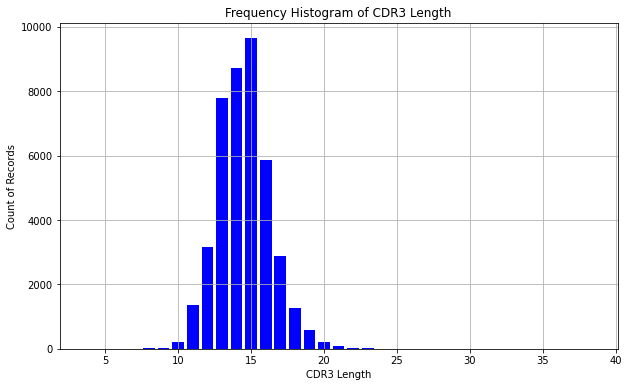

In [56]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cdr3_length_count['CDR3_Length'], cdr3_length_count['count_of_records'], width=0.8, color='b')
plt.xlabel('CDR3 Length')
plt.ylabel('Count of Records')
plt.title('Frequency Histogram of CDR3 Length')
plt.grid(True)
plt.show()

In [48]:
sample_dataset.head(10)

,cdr3,antigen.epitope,vdjdb.score,species,gene,mhc.class,CDR3_Length
1,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI,20
2,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI,19
4,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI,19
6,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2,HomoSapiens,TRB,MHCI,20
8,CASSALASLNEQFF,FLKEKGGL,2,HomoSapiens,TRB,MHCI,14
10,CASSYLPGQGDHYSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI,20
11,CASSFEAGQGFFSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI,19
13,CASSFEPGQGFYSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI,19
15,CASSYEPGQVSHYSNQPQHF,FLKEQGGL,2,HomoSapiens,TRB,MHCI,20
17,CASSYLPGQGDHYSNQPQHF,FLKETGGL,2,HomoSapiens,TRB,MHCI,20


In [61]:
## Remove rows which have CDR3 lengths < 10 or > 20
sample_dataset = sample_dataset[(sample_dataset['CDR3_Length'] >= 10) & (sample_dataset['CDR3_Length'] <= 20)]

## Finding Epitope Lengths

In [63]:
sample_dataset['Epitope_Length'] = sample_dataset.apply(lambda row: len(row['antigen.epitope']),axis=1)

In [65]:
epitope_length_count = sample_dataset.groupby(by=['Epitope_Length']).size().to_frame('count_of_records').reset_index()

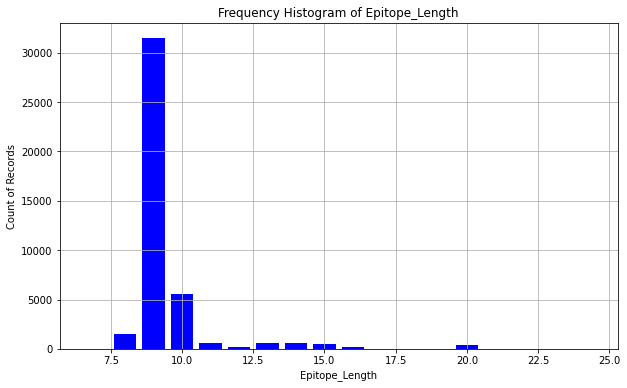

In [66]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(epitope_length_count['Epitope_Length'], epitope_length_count['count_of_records'], width=0.8, color='b')
plt.xlabel('Epitope_Length')
plt.ylabel('Count of Records')
plt.title('Frequency Histogram of Epitope_Length')
plt.grid(True)
plt.show()

## Taking only those epitopes which have 10 or more associated TCR sequences

In [89]:
group_antigen_cdr3 = sample_dataset.groupby(['antigen.epitope'])['cdr3'].unique().to_frame('cdr3_found').reset_index()

In [90]:
group_antigen_cdr3['cdr3_found_count'] = group_antigen_cdr3['cdr3_found'].apply(lambda x:len(x))

In [91]:
group_antigen_cdr3_count = group_antigen_cdr3.groupby(by=['cdr3_found_count']).size().to_frame('count').reset_index()

In [93]:
group_antigen_cdr3_count.describe()

,cdr3_found_count,count
count,108.000000,108.000000
mean,341.277778,10.240741
std,1331.830957,47.892182
min,1.000000,1.000000
25%,27.750000,1.000000
50%,63.000000,1.000000
75%,155.250000,2.000000
max,12595.000000,450.000000


In [94]:
group_antigen_cdr3.head(2)

,antigen.epitope,cdr3_found,cdr3_found_count
0,AAFKRSCLK,"[CASSQGFGANVLTF, CASVSGQGVSPLHF, CATSRDGAGLVNQ...",5
1,AAGIGILTV,"[CASSLSFGTEAFF, CAISEVGVGQPQHF, CASSWSFGTEAFF,...",5


In [100]:
antigen_needed_list = group_antigen_cdr3[group_antigen_cdr3['cdr3_found_count'] >= 10]['antigen.epitope']

In [105]:
antigen_needed_list[:10]

8      AIFYLITPV
29     ALSKGVHFV
33     ALWEIQQVV
41     AMFWSVPTV
62     ARMILMTHF
64     ATDALMTGF
65     ATDALMTGY
71    AVFDRKSDAK
77     AYAQKIFKI
79     CINGVCWTV
Name: antigen.epitope, dtype: object

### Selecting only these epitopes

In [103]:
sample_dataset = sample_dataset[sample_dataset['antigen.epitope'].isin(antigen_needed_list)]

## Assigning Negative and Positive Samples

Records with VDJ score 0 and 1 are Negative samples while Score of 2 and 3 are positive samples

In [107]:
sample_dataset['confidence'] = sample_dataset['vdjdb.score'].apply(lambda score: 1 if score >=2 else 0)

In [110]:
sample_dataset.groupby(by=['confidence']).size()

confidence
0    38189
1     1335
dtype: int64

### Encoding TCR and epitopes

---

In [50]:
list_cdr3 = dataset['cdr3'].unique()

In [34]:
average_lengths = {}
for cdr3 in list_cdr3:
    length = len(cdr3)
    if length not in average_lengths.keys():
        average_lengths[length] = 1
    else:
        average_lengths[length] = average_lengths[length] + 1

In [37]:
# Filter cdr3 which have lengths between 5-30
cdr3_lengths_df = pd.DataFrame({'CDR3 Length':average_lengths.keys(),'COUNT':average_lengths.values()})

In [40]:
cdr3_lengths_df.sort_values(by=['COUNT'],ascending=False)

,CDR3 Length,COUNT
5,15,14847
3,14,14344
0,13,12970
6,16,8132
8,12,6810
7,17,4214
4,11,3531
9,18,1708
13,10,986
2,19,716
